In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from splinter import Browser


In [389]:
#{"First Name": "", "Last Name":""}, this is easier for now but doesnt work for players with same name as former players
#center fielders for this example
player_list = [{"First Name": "George", "Last Name":"Springer"},
               {"First Name": "Mike", "Last Name":"Trout"},
                {"First Name": "Kevin", "Last Name":"Pillar"},
                  {"First Name": "Lorenzo", "Last Name":"Cain"},
                  {"First Name": "Aaron", "Last Name":"Hicks"},
                  {"First Name": "Byron", "Last Name":"Buxton"},
                  {"First Name": "Juan", "Last Name":"Lagares"},{"First Name": "Scott", "Last Name":"Kingery"},
                  {"First Name": "Starling", "Last Name":"Marte"}]

player_df = pd.DataFrame(player_list)

url_list = []

final_player_list = []

for i, player in player_df.iterrows():
    first_name = player["First Name"]
    last_name = player["Last Name"]
    name = player["Last Name"], player["First Name"]
    final_player_list.append(name)
    url_first_name = first_name[0:2].lower()
    url_last_name = last_name[0:5].lower()
    url_first_letter = last_name[0].lower()
    
    url = 'https://www.baseball-reference.com/players/' + url_first_letter + '/' + url_last_name + url_first_name + '01.shtml'
    url_list.append(url)

final_player_list


[('Springer', 'George'),
 ('Trout', 'Mike'),
 ('Pillar', 'Kevin'),
 ('Cain', 'Lorenzo'),
 ('Hicks', 'Aaron'),
 ('Buxton', 'Byron'),
 ('Lagares', 'Juan'),
 ('Kingery', 'Scott'),
 ('Marte', 'Starling')]

In [390]:
clean_stats_list = []

executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

for url in url_list:
    
    browser.visit(url)
    time.sleep(1)
    html = browser.html
    tables = pd.read_html(html)
    
    Salary_matches = []
    WAR_matches = []
    ##### add HR and BAA then append to the clean stats table by year
    
    for table in tables:
        if 'Salary' in table.columns:
            Salary_matches.append(table)
            
    sal_df = Salary_matches[0]
    sal_df = sal_df[["Salary", "Year"]]
    
    for table in tables:
        if 'WAR' in table.columns:
            WAR_matches.append(table)
            
    WAR_df = WAR_matches[0]
    war_df = pd.DataFrame(WAR_df)
    war_df = war_df[["WAR", "Year"]]
    
    
    
    
    ##########
    merged_df = pd.merge(war_df, sal_df, on = "Year")
    merged_df = merged_df.dropna()
    merged_df
    clean_stats_list.append(merged_df)
    print(merged_df)




    WAR       Year       Salary
1   3.9       2015     $512,900
2   5.1       2016     $522,400
3   4.7       2017   $3,900,000
4   2.7       2018  $12,000,000
5   4.2       2019  $12,000,000
6  22.7  6 Seasons  $28,935,300
    WAR       Year        Salary
1  10.5       2012      $492,500
2   9.0       2013      $510,000
3   7.6       2014    $1,000,000
4   9.4       2015    $6,083,000
5  10.5       2016   $16,083,000
6   6.6       2017   $20,083,000
7  10.2       2018   $34,083,000
8   8.2       2019   $36,833,333
9  72.4  9 Seasons  $115,167,833
     WAR         Year       Salary
2    4.9         2015     $512,000
3    3.5         2016     $521,100
4    3.0         2017     $555,000
5    2.5         2018   $3,250,000
7   -0.4         2019   $5,800,000
9    1.6         2019   $5,800,000
10  15.9    7 Seasons  $10,638,100
12  14.3  TOR (7 yrs)   $4,838,100
13   1.6   SFG (1 yr)   $5,800,000
     WAR         Year       Salary
2    1.7         2012     $480,850
3    3.1         2013     

In [426]:
Better_list = []
for x in clean_stats_list:
    grouped = x.groupby(["Year", "Salary"])
    grouped_sum = grouped.sum()
    #grouped_sum = pd.DataFrame(grouped_sum)
    grouped_sum = grouped_sum.reset_index()
    Better_list.append(grouped_sum)
    
    

Better_list[0]

,Year,Salary,WAR
0,2015,"$512,900",3.9
1,2016,"$522,400",5.1
2,2017,"$3,900,000",4.7
3,2018,"$12,000,000",2.7
4,2019,"$12,000,000",4.2
5,6 Seasons,"$28,935,300",22.7


In [427]:
#### salary needs to drop the $ and .isnumeric() so I can graph it
#Better_list[0]["Salary"][0].replace("$", "").replace(',','')     pd.tonumeric
squeaky_clean_dfs = []
for i in Better_list:
    new_df = i
    new_df["Salary"] = new_df["Salary"].replace('[\$,]', '', regex=True).astype(float)
    squeaky_clean_dfs.append(new_df)
            
            

Better_list = squeaky_clean_dfs

In [428]:
final_list_of_dfs = []


for testing in Better_list:
    df = testing[testing['Year'].str.contains('^[12][0-9]{3}$')]
    final_list_of_dfs.append(df)



final_list_of_dfs


[   Year      Salary  WAR
 0  2015    512900.0  3.9
 1  2016    522400.0  5.1
 2  2017   3900000.0  4.7
 3  2018  12000000.0  2.7
 4  2019  12000000.0  4.2,    Year      Salary   WAR
 0  2012    492500.0  10.5
 1  2013    510000.0   9.0
 2  2014   1000000.0   7.6
 3  2015   6083000.0   9.4
 4  2016  16083000.0  10.5
 5  2017  20083000.0   6.6
 6  2018  34083000.0  10.2
 7  2019  36833333.0   8.2,    Year     Salary  WAR
 0  2015   512000.0  4.9
 1  2016   521100.0  3.5
 2  2017   555000.0  3.0
 3  2018  3250000.0  2.5
 4  2019  5800000.0  1.2,    Year      Salary  WAR
 1  2012    480850.0  1.7
 2  2013    503175.0  3.1
 3  2014    546000.0  4.9
 4  2015   2725000.0  7.2
 5  2016   6500000.0  3.0
 6  2017  11000000.0  5.4
 7  2018  14000000.0  6.9
 8  2019  15000000.0  1.9,    Year     Salary  WAR
 0  2013   490000.0  0.6
 1  2014   507500.0  0.2
 2  2016   574000.0 -0.3
 3  2017  1350000.0  3.9
 4  2018  2825000.0  4.7
 5  2019  6285714.0  1.3,    Year     Salary  WAR
 0  2016   512500

In [429]:
dict_of_player_stats = dict(zip(final_player_list,final_list_of_dfs)) 
dict_of_player_stats

{('Springer', 'George'):    Year      Salary  WAR
 0  2015    512900.0  3.9
 1  2016    522400.0  5.1
 2  2017   3900000.0  4.7
 3  2018  12000000.0  2.7
 4  2019  12000000.0  4.2, ('Trout', 'Mike'):    Year      Salary   WAR
 0  2012    492500.0  10.5
 1  2013    510000.0   9.0
 2  2014   1000000.0   7.6
 3  2015   6083000.0   9.4
 4  2016  16083000.0  10.5
 5  2017  20083000.0   6.6
 6  2018  34083000.0  10.2
 7  2019  36833333.0   8.2, ('Pillar', 'Kevin'):    Year     Salary  WAR
 0  2015   512000.0  4.9
 1  2016   521100.0  3.5
 2  2017   555000.0  3.0
 3  2018  3250000.0  2.5
 4  2019  5800000.0  1.2, ('Cain', 'Lorenzo'):    Year      Salary  WAR
 1  2012    480850.0  1.7
 2  2013    503175.0  3.1
 3  2014    546000.0  4.9
 4  2015   2725000.0  7.2
 5  2016   6500000.0  3.0
 6  2017  11000000.0  5.4
 7  2018  14000000.0  6.9
 8  2019  15000000.0  1.9, ('Hicks', 'Aaron'):    Year     Salary  WAR
 0  2013   490000.0  0.6
 1  2014   507500.0  0.2
 2  2016   574000.0 -0.3
 3  2017  13

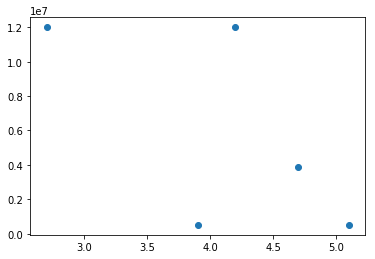

In [430]:
plt.scatter(final_list_of_dfs[0]["WAR"], final_list_of_dfs[0]['Salary'])

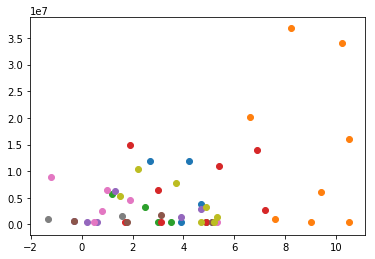

In [431]:
for i in final_list_of_dfs:
    plt.scatter(i["WAR"], i['Salary'])